<a href="https://colab.research.google.com/github/TANISHABASU26/Customer-Segmentation-for-E-commerce-Website/blob/main/Customer_Segmentation_for_E_commerce_Website.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
data = pd.read_csv('/E-commerce Customer Data.csv')
data.head()

,\tEmail,Address,Avatar,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank TunnelWrightmouth, MI 82180-9605",Violet,12.66,39.58,4.08,587.95
1,hduke@hotmail.com,"4547 Archer CommonDiazchester, CA 06566-8576",DarkGreen,11.11,37.27,2.66,392.20
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582Cobbborough, DC ...",Bisque,11.33,37.11,4.10,487.55
3,riverarebecca@gmail.com,"1414 David ThroughwayPort Jason, OH 22070-1220",SaddleBrown,13.72,36.72,3.12,581.85
4,mstephens@davidson-herman.com,"14023 Rodriguez PassagePort Jacobville, PR 372...",MediumAquaMarine,12.80,37.54,4.45,599.41


In [3]:
data.isnull().sum()


\tEmail                 0
Address                 0
Avatar                  0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [7]:
data = data.dropna(subset=['\tEmail'])


In [6]:
# Check the column names in your DataFrame
print(data.columns)



Index(['\tEmail', 'Address', 'Avatar', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')


In [8]:
data.duplicated().sum()


0

In [12]:
data.drop_duplicates(inplace=True)


In [13]:
features = ['Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']
X = data[features]

In [14]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


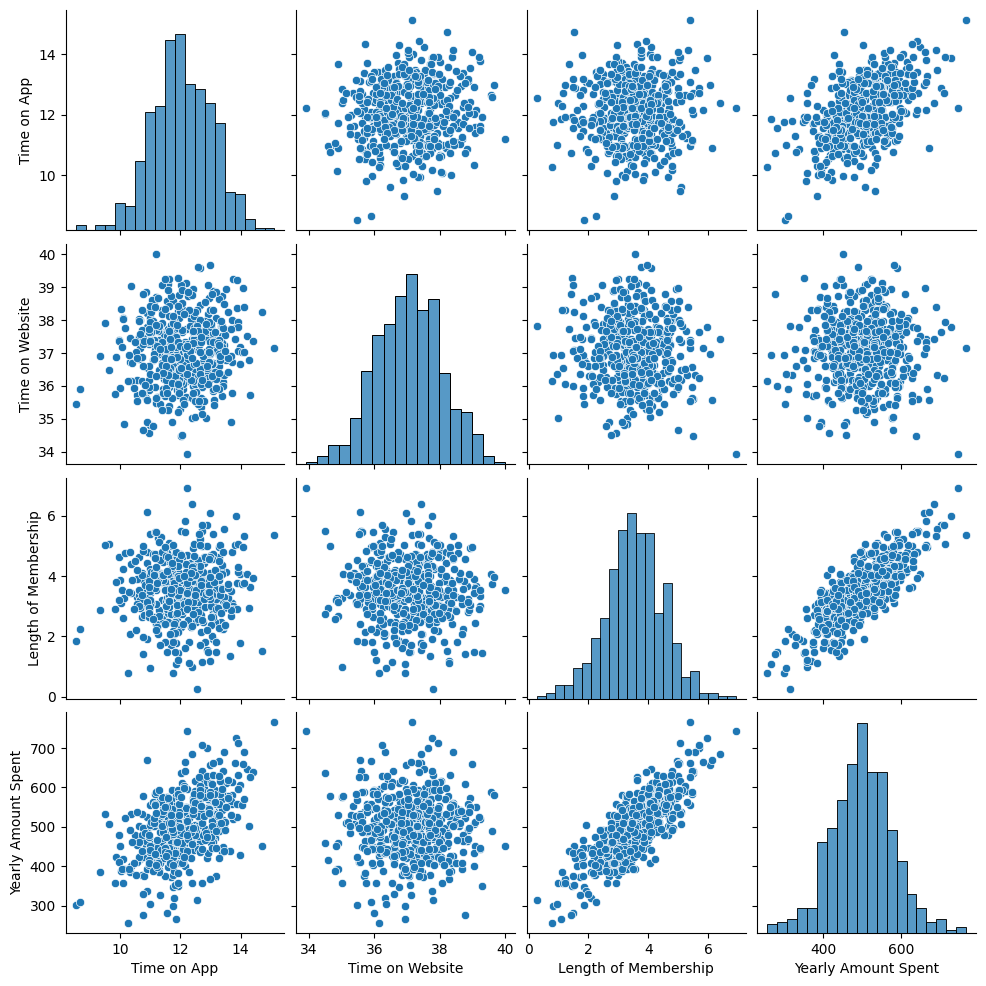

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot
sns.pairplot(data[features])
plt.show()


In [17]:
from sklearn.cluster import KMeans
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

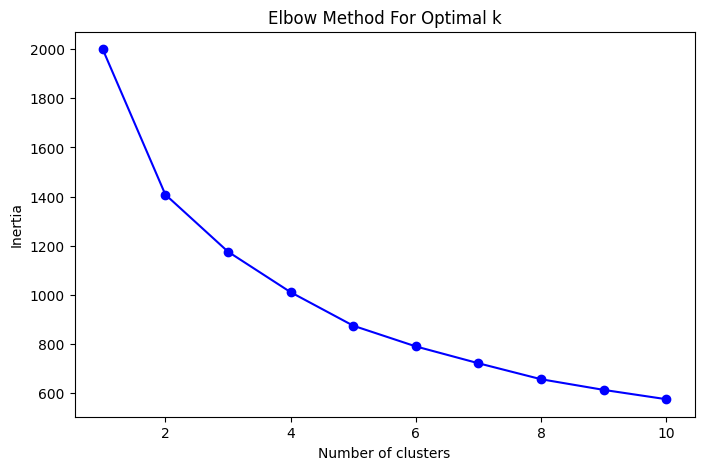

In [18]:
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [19]:
from sklearn.cluster import KMeans

# Fit the K-Means model with the optimal number of clusters (k=3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
data['Cluster'] = clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
# Analyze the clusters, excluding non-numeric columns
cluster_analysis = data.groupby('Cluster').mean(numeric_only=True)
print(cluster_analysis)

         Time on App  Time on Website  Length of Membership  \
Cluster                                                       
0          11.720296        37.371006              2.583964   
1          12.831401        37.572675              4.143503   
2          11.672701        36.296724              3.904943   

         Yearly Amount Spent   TotalPrice  
Cluster                                    
0                 422.470592  1113.019061  
1                 571.448981  2396.379976  
2                 508.862644  2010.338229  


<Figure size 640x480 with 0 Axes>

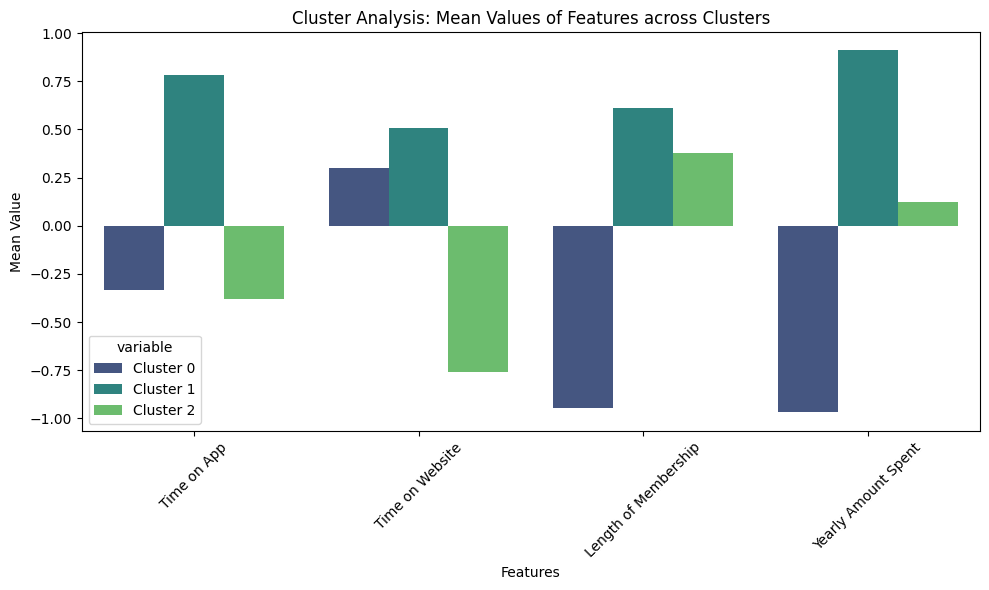

In [25]:
import os


# Create the 'images' directory if it doesn't exist
if not os.path.exists('images'):
    os.makedirs('images')

plt.savefig('images/cluster_analysis.png')  # Save the plot as an image
plt.show()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'kmeans' is already fitted with your optimal_k and X_scaled

# Get cluster centers from the fitted KMeans model
cluster_centers = kmeans.cluster_centers_

# Create a DataFrame to store cluster centers with feature names
cluster_center_df = pd.DataFrame(cluster_centers, columns=features)

# Transpose the DataFrame for better visualization
cluster_center_df = cluster_center_df.T.reset_index()
cluster_center_df.columns = ['Feature', 'Cluster 0', 'Cluster 1', 'Cluster 2']  # Adjust cluster labels as needed

# Plotting using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='value', hue='variable', data=pd.melt(cluster_center_df, id_vars=['Feature']), palette='viridis')
plt.title('Cluster Analysis: Mean Values of Features across Clusters')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('images/cluster_analysis.png')  # Save the plot as an image
plt.show()


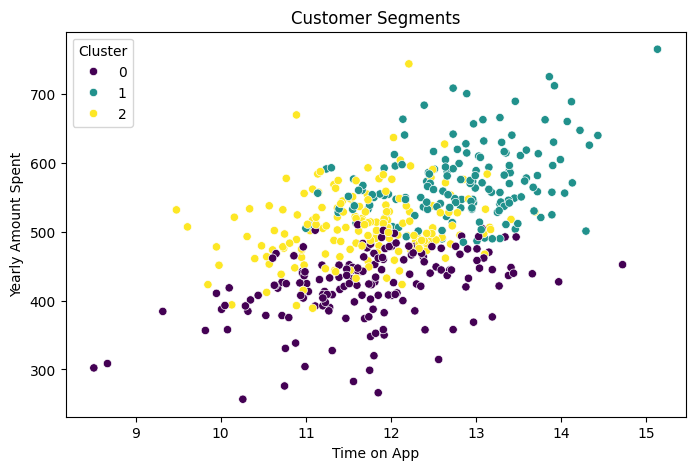

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Time on App', y='Yearly Amount Spent', hue='Cluster', data=data, palette='viridis')
plt.title('Customer Segments')
plt.show()
